##**SDAIA Bootcamp Project  ( سالك )**



This code performs classification of road conditions into three classes: normal, traffic, and anomaly (specifically for fire and accidents).

# Import Data

In [1]:
#connect to googel drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#connect to dataset
p= '/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1'

# Packages


In [3]:
#import all packeges
import tensorflow as tf  # Import the TensorFlow library for deep learning
import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import the matplotlib library for data visualization
from matplotlib.pyplot import *
import cv2  # Import the OpenCV library for image processing
import glob  # Import the glob module for file system operations
import seaborn as sns  # Import the seaborn library for statistical data visualization
import os  # Import the os module for operating system-related functionalities
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn for splitting data
from tensorflow.keras import datasets, layers, models  # Import specific moduls
from sklearn.metrics import confusion_matrix, classification_report  # Import confusion_matrix and classification_report functions for model evaluation
from tensorflow import keras  # Import the keras module from TensorFlow for building deep learning models
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator class for data augmentation
from tensorflow.keras.models import Sequential  # Import the Sequential class from keras for creating sequential models
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D  # Import specific layers from keras for building convolutional neural networks
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy  # Import specific loss functions from keras for model training
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer for model training

# Preprocessing

In [4]:
#our classes
classes=["anomaly","normal","traffic"]


In [5]:
#create labels for train dataset
#get the image file path
path = "/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/train"
path_imgs = list(glob.glob(path+'/**/*.jpg'))
# Create labels
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs))
# Create a Pandas Series for file paths and labels
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
# Concatenate file_path and labels into a DataFrame
datatrain = pd.concat([file_path, labels], axis=1)
# Shuffle the DataFrame
datatrain = datatrain.sample(frac=1).reset_index(drop=True)
# Display the first 5 rowes for data
datatrain.head()


File_Path   Labels
0  /content/drive/MyDrive/trafficnet_dataset_v1/t...  traffic
1  /content/drive/MyDrive/trafficnet_dataset_v1/t...  traffic
2  /content/drive/MyDrive/trafficnet_dataset_v1/t...  anomaly
3  /content/drive/MyDrive/trafficnet_dataset_v1/t...   normal
4  /content/drive/MyDrive/trafficnet_dataset_v1/t...   normal

In [6]:
# same process for craeting labels for test data
path = "/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/test"
path_imgs = list(glob.glob(path+'/**/*.jpg'))
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs))
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
datatest = pd.concat([file_path, labels], axis=1)
datatest = datatest.sample(frac=1).reset_index(drop=True)
datatest.head()

File_Path   Labels
0  /content/drive/MyDrive/trafficnet_dataset_v1/t...  anomaly
1  /content/drive/MyDrive/trafficnet_dataset_v1/t...  anomaly
2  /content/drive/MyDrive/trafficnet_dataset_v1/t...  anomaly
3  /content/drive/MyDrive/trafficnet_dataset_v1/t...  anomaly
4  /content/drive/MyDrive/trafficnet_dataset_v1/t...   normal

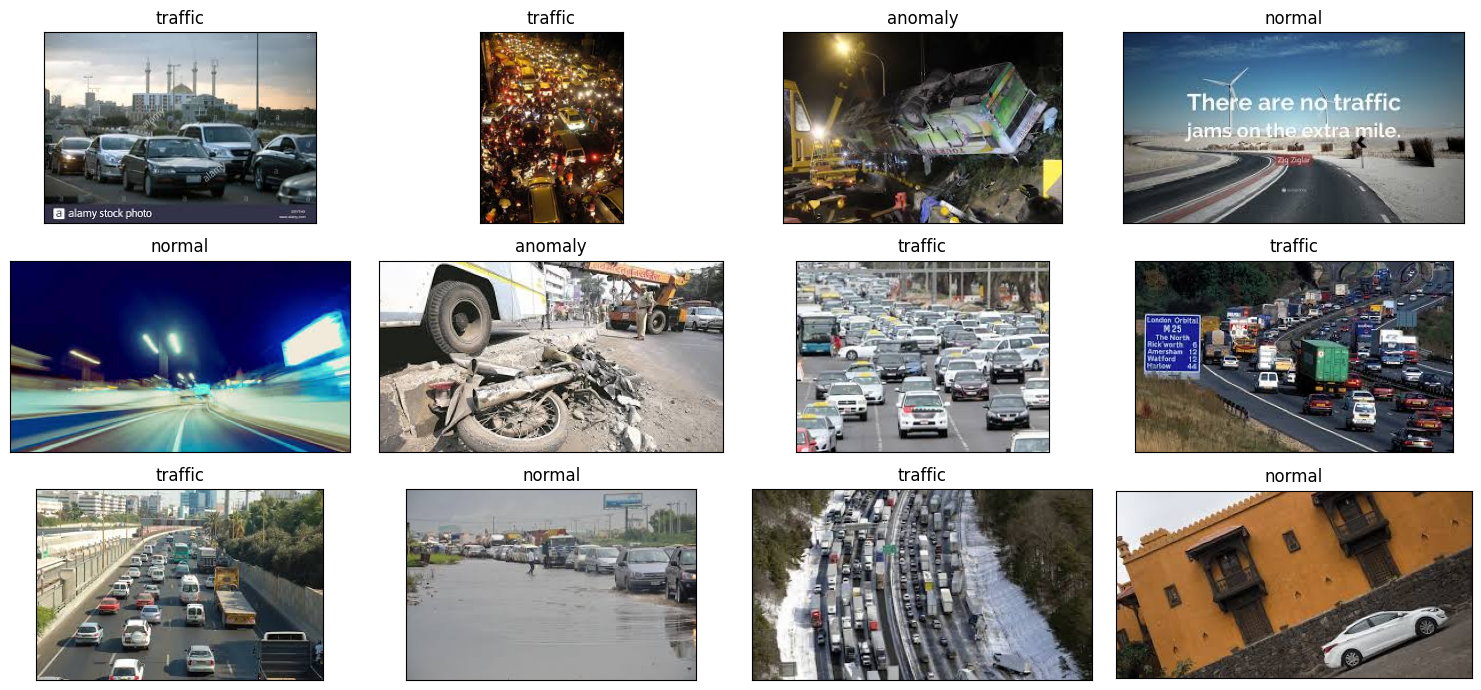

In [7]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
# Iterate over the flattened array of axes
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(plt.imread(datatrain.File_Path[i]))
    # set the titel
    ax.set_title(datatrain.Labels[i])
plt.tight_layout()
plt.show()

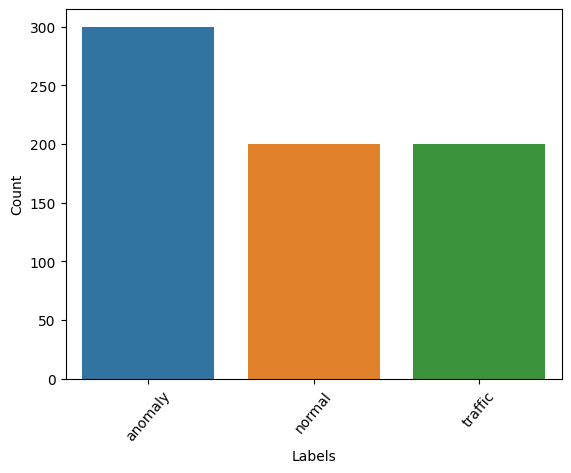

In [8]:
# create bar chart for our classes with counts
counts = datatest.Labels.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

In [9]:
data=[] # Initialize an empty list to store image data and labels
# Iterate over the classes
for c in classes:
    i=classes.index(c)
    path = os.path.join('/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/train/', c)
    # Iterate over the files in the class directory
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            # Process  and resize the images
            im=cv2.imread(os.path.join(path,img))
            im=cv2.resize(im,(224,224))
            # Append the image and its corresponding label to the data lis
            data.append([im,i])
        else:
            # Skip other files (DB files in this case)
            continue

In [10]:
#converting the data into a NumPy array allows for efficient operations on the data.
data=np.array(data)
import random
random.shuffle(data)

<ipython-input-10-60b4dfe7bb24>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [11]:
X=[]
Y=[]
for x,y in data:
    X.append(x)  # Append the image data to the X list
    Y.append(y)  # Append the label to the Y list

In [12]:
# Convert the list of image data and labels to a NumPy array then print the shape
x = np.array(X)
y = np.array(Y)
print(x.shape,y.shape)

(2780, 224, 224, 3) (2780,)


In [13]:
# Split the data into training and testing sets with a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)

In [14]:
# Normalize the pixel values of x_train and x_test between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


In [15]:
print("Train set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Train set shape: (2224, 224, 224, 3)
Test set shape: (556, 224, 224, 3)


In [18]:
# Split the data into training and validation sets
x_train, data_x_val, y_train, data_y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=4)

In [19]:
num_images_val = len(x_train)
print("Number of images in train set:", num_images_val)

Number of images in train set: 2001


In [20]:
num_images_val = len(x_test)
print("Number of images in test set:", num_images_val)

Number of images in test set: 556


In [21]:

num_images_val = len(data_x_val)
print("Number of images in validation set:", num_images_val)

Number of images in validation set: 223


In [22]:
x_train.shape

(2001, 224, 224, 3)

# Build MobileNetV2 Model

In [23]:
# Create a MobileNetV2 model with specified configuration and load pre-trained weights
model_mobileNet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax')

# freeze layers in base model
for layer in model_mobileNet.layers:
    layer.trainable = False


14536120/14536120 [==============================] - 2s 0us/step


In [24]:
# Get the input tensor of the base model
# Get the output tensor of the second-to-last layer in the base model
base_input1 = model_mobileNet.layers[0].input
base_output1 = model_mobileNet.layers[-2].output

final_output1 = layers.Dense(128)(base_output1)  # Add a Dense layer with 128 units on top of the base model's output
final_output1 = layers.Activation('relu')(final_output1) # Apply a ReLU activation to the previous layer's output
final_output1 = layers.Dense(64)(final_output1) # Add another Dense layer with 64 units
final_output1 = layers.Activation('relu')(final_output1)  # Apply a ReLU activation to the previous layer's output
final_output1 = layers.Dense(6, activation='softmax')(final_output1) # Add a final Dense layer with 6 units and a softmax activation

new_model_mobileNet = tf.keras.Model(inputs = base_input1, outputs = final_output1)
new_model_mobileNet.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"]) # Compile the new model with the specified loss, optimizer, and metrics


In [25]:
#use callback stop the training process early if the monitored metric stops improving
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [26]:
#fit the model
history_new_model_mobileNet = new_model_mobileNet.fit(x_train, y_train, epochs=25,callbacks=[callback], validation_data=(data_x_val, data_y_val))

Epoch 1/25
63/63 [==============================] - 16s 84ms/step - loss: 0.5243 - accuracy: 0.8136 - val_loss: 0.2959 - val_accuracy: 0.9058
Epoch 2/25
63/63 [==============================] - 3s 47ms/step - loss: 0.2548 - accuracy: 0.9160 - val_loss: 0.2003 - val_accuracy: 0.9193
Epoch 3/25
63/63 [==============================] - 3s 47ms/step - loss: 0.1914 - accuracy: 0.9355 - val_loss: 0.1601 - val_accuracy: 0.9507
Epoch 4/25
63/63 [==============================] - 3s 47ms/step - loss: 0.1590 - accuracy: 0.9470 - val_loss: 0.1430 - val_accuracy: 0.9462
Epoch 5/25
63/63 [==============================] - 3s 48ms/step - loss: 0.1298 - accuracy: 0.9605 - val_loss: 0.1791 - val_accuracy: 0.9417
Epoch 6/25
63/63 [==============================] - 3s 47ms/step - loss: 0.1132 - accuracy: 0.9640 - val_loss: 0.1053 - val_accuracy: 0.9731
Epoch 7/25
63/63 [==============================] - 3s 47ms/step - loss: 0.0949 - accuracy: 0.9730 - val_loss: 0.1272 - val_accuracy: 0.9641
Epoch 8/25
6

In [27]:
# Predict the classes on the test set.
y_predict = new_model_mobileNet.predict(x_test)

18/18 [==============================] - 2s 68ms/step


In [28]:
# Evaluate the model
result_MobileNetV2_val = new_model_mobileNet.evaluate(x_train, y_train)
print("\nTraining Accuracy: %.2f%%" % (result_MobileNetV2_val[1]*100))
result_MobileNetV2 = new_model_mobileNet.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_MobileNetV2[1]*100))

63/63 [==============================] - 3s 43ms/step - loss: 0.0154 - accuracy: 0.9985

Training Accuracy: 99.85%
18/18 [==============================] - 1s 41ms/step - loss: 0.0943 - accuracy: 0.9712

Testing Accuracy: 97.12%


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       399
           1       0.94      0.93      0.93       123
           2       0.97      0.88      0.92        34

    accuracy                           0.97       556
   macro avg       0.96      0.93      0.95       556
weighted avg       0.97      0.97      0.97       556



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


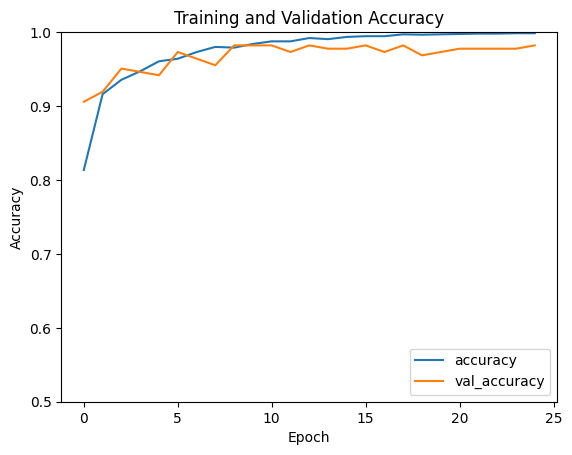

In [29]:
# Plot validation accuracy
# Plot training accuracy
plt.plot(history_new_model_mobileNet.history['accuracy'], label='accuracy')
plt.plot(history_new_model_mobileNet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#classification_report
print(classification_report(y_test, np.argmax(y_predict, axis=1)))
# Save the new model to a file
new_model_mobileNet.save("new_model_mobileNet.h5")

# Build ResNet50V2 Model

In [30]:
# Create a ResNet50V2 model with specified configuration and load pre-trained weights
model_resNet50V2 = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax')

# freeze layers in base model
for layer in model_resNet50V2.layers:
    layer.trainable = False

#model_resNet50V2.summary()

102869336/102869336 [==============================] - 6s 0us/step


In [31]:
base_input2 = model_resNet50V2.layers[0].input
base_output2 = model_resNet50V2.layers[-2].output

final_output2 = layers.Dense(240)(base_output2) # Add a Dense layer
final_output2 = layers.Activation('relu')(final_output2) # Apply a ReLU activation
final_output2 = layers.Dense(128)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)

final_output2 = layers.Dropout(0.5)(final_output2)

final_output2 = layers.Dense(64)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(6, activation='softmax')(final_output2)

new_model_resNet50V2 = tf.keras.Model(inputs = base_input2, outputs = final_output2)
new_model_resNet50V2.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

# Train RseNet50V2 Model



In [32]:
#fit the model
history_new_model_resNet50V2 = new_model_resNet50V2.fit(x_train, y_train, epochs=25,callbacks=[callback], validation_data=(data_x_val, data_y_val))

Epoch 1/25
63/63 [==============================] - 15s 155ms/step - loss: 0.6260 - accuracy: 0.7781 - val_loss: 0.3066 - val_accuracy: 0.8969
Epoch 2/25
63/63 [==============================] - 6s 101ms/step - loss: 0.3282 - accuracy: 0.8946 - val_loss: 0.2111 - val_accuracy: 0.9462
Epoch 3/25
63/63 [==============================] - 6s 101ms/step - loss: 0.2373 - accuracy: 0.9275 - val_loss: 0.1980 - val_accuracy: 0.9103
Epoch 4/25
63/63 [==============================] - 6s 102ms/step - loss: 0.2027 - accuracy: 0.9375 - val_loss: 0.1580 - val_accuracy: 0.9507
Epoch 5/25
63/63 [==============================] - 6s 102ms/step - loss: 0.1583 - accuracy: 0.9465 - val_loss: 0.1439 - val_accuracy: 0.9552
Epoch 6/25
63/63 [==============================] - 6s 101ms/step - loss: 0.1364 - accuracy: 0.9525 - val_loss: 0.1312 - val_accuracy: 0.9507
Epoch 7/25
63/63 [==============================] - 6s 101ms/step - loss: 0.1056 - accuracy: 0.9645 - val_loss: 0.1365 - val_accuracy: 0.9596
Epoch

In [33]:
# Perform prediction on the test data using the new_model_resNet50V2
y_predict = new_model_resNet50V2.predict(x_test)


18/18 [==============================] - 3s 135ms/step


In [34]:
result_ResNet50V2_val = new_model_resNet50V2.evaluate(x_train, y_train)

63/63 [==============================] - 6s 90ms/step - loss: 0.0095 - accuracy: 0.9975


In [35]:
#print the accuracy for training and testing
print("\nTraining Accuracy: %.2f%%" % (result_ResNet50V2_val[1]*100))
result_ResNet50V2 = new_model_resNet50V2.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_ResNet50V2[1]*100))



Training Accuracy: 99.75%
18/18 [==============================] - 2s 86ms/step - loss: 0.1419 - accuracy: 0.9676

Testing Accuracy: 96.76%


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       399
           1       0.92      0.93      0.93       123
           2       0.97      0.91      0.94        34

    accuracy                           0.97       556
   macro avg       0.96      0.94      0.95       556
weighted avg       0.97      0.97      0.97       556



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


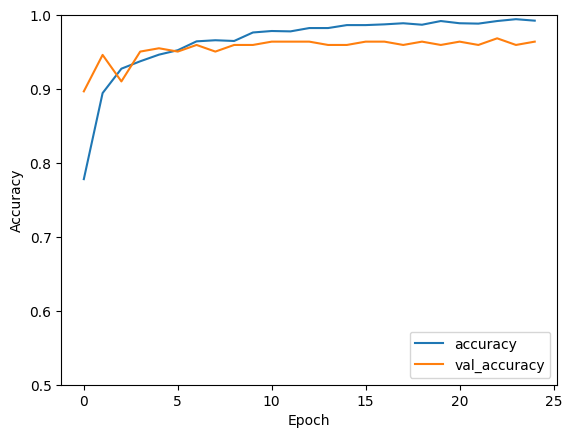

In [36]:
# Plot training accuracy
# Plot validation accuracy
plt.plot(history_new_model_resNet50V2.history['accuracy'], label='accuracy')
plt.plot(history_new_model_resNet50V2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#classification_report
print(classification_report(y_test, np.argmax(y_predict, axis=1)))
# Save the new model to a file
new_model_resNet50V2.save("new_model_resNet50V2.h5")

# Build DenseNet169 Model

In [57]:
# Create a DenseNet169 model with pre-trained weights from ImageNet
model_denseNet169 = tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    # classifier_activation='softmax'
    classifier_activation='softmax')

# freeze layers in base model
for layer in model_denseNet169.layers:
    layer.trainable = False

# model_denseNet169.summary()

In [58]:
base_input3 = model_denseNet169.layers[0].input
base_output3 = model_denseNet169.layers[-2].output

final_output3 = layers.Dense(128)(base_output3) # add a dense layer with 240 units
final_output3 = layers.Activation('relu')(final_output3) # apply the ReLU activation function
final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)

final_output3 = layers.Dropout(0.3)(final_output3) # apply a dropout layer with a rate of 0.2 to prevent overfitting ***

##final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(6, activation='sigmoid')(final_output3) ###****

new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3) # create a new model
new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "RMSprop", metrics = ["accuracy"]) # ***compile the model with the specified loss function, optimizer, and metric


In [59]:
# fit the model
history_new_model_denseNet169 = new_model_denseNet169.fit(x_train, y_train, epochs=20, validation_data=(data_x_val, data_y_val))

Epoch 1/20
63/63 [==============================] - 20s 179ms/step - loss: 0.4753 - accuracy: 0.8371 - val_loss: 0.5258 - val_accuracy: 0.8251
Epoch 2/20
63/63 [==============================] - 8s 129ms/step - loss: 0.2185 - accuracy: 0.9275 - val_loss: 0.1635 - val_accuracy: 0.9462
Epoch 3/20
63/63 [==============================] - 8s 130ms/step - loss: 0.1559 - accuracy: 0.9485 - val_loss: 0.1432 - val_accuracy: 0.9596
Epoch 4/20
63/63 [==============================] - 8s 130ms/step - loss: 0.1126 - accuracy: 0.9610 - val_loss: 0.1973 - val_accuracy: 0.9193
Epoch 5/20
63/63 [==============================] - 8s 130ms/step - loss: 0.0933 - accuracy: 0.9690 - val_loss: 0.1626 - val_accuracy: 0.9596
Epoch 6/20
63/63 [==============================] - 8s 128ms/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.1036 - val_accuracy: 0.9821
Epoch 7/20
63/63 [==============================] - 8s 127ms/step - loss: 0.0522 - accuracy: 0.9825 - val_loss: 0.6292 - val_accuracy: 0.8027
Epoch

In [60]:
y_predict = new_model_denseNet169.predict(x_test)

18/18 [==============================] - 5s 113ms/step


In [61]:
result_DenseNet169_val = new_model_denseNet169.evaluate(x_train, y_train)

63/63 [==============================] - 7s 114ms/step - loss: 0.0010 - accuracy: 0.9995


In [62]:
# print the accuracy for training and testing
print("\nTraining Accuracy: %.2f%%" % (result_DenseNet169_val[1]*100))
result_DenseNet169 = new_model_denseNet169.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_DenseNet169[1]*100))


Training Accuracy: 99.95%
18/18 [==============================] - 2s 110ms/step - loss: 0.2082 - accuracy: 0.9712

Testing Accuracy: 97.12%


In [63]:
# Plot the training and validation accuracy
plt.plot(history_new_model_denseNet169.history['accuracy'], label='accuracy')
plt.plot(history_new_model_denseNet169.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
print(classification_report(y_test, np.argmax(y_predict, axis=1)))

# Save the new model
#new_model_mobileNet.save("new_model_denseNet169.h5")

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       399
           1       0.92      0.95      0.94       123
           2       0.91      0.88      0.90        34

    accuracy                           0.97       556
   macro avg       0.94      0.94      0.94       556
weighted avg       0.97      0.97      0.97       556



# Build CNN Model

In [64]:
CNN = Sequential()

CNN.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

CNN.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2, 2)))

# Classification layers
CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dropout(0.2))
CNN.add(Dense(32, activation='relu'))

CNN.add(Dropout(0.2))
CNN.add(Dense(6, activation='softmax'))


In [65]:
# compile the CNN model
CNN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [66]:
#fit CNN model
history_model = CNN.fit(x_train, y_train, epochs=20, validation_data=(data_x_val, data_y_val))

Epoch 1/20
63/63 [==============================] - 4s 47ms/step - loss: 0.9230 - accuracy: 0.6852 - val_loss: 0.7550 - val_accuracy: 0.7130
Epoch 2/20
63/63 [==============================] - 2s 38ms/step - loss: 0.8147 - accuracy: 0.7006 - val_loss: 0.8510 - val_accuracy: 0.7130
Epoch 3/20
63/63 [==============================] - 2s 38ms/step - loss: 0.8043 - accuracy: 0.7131 - val_loss: 0.7507 - val_accuracy: 0.7130
Epoch 4/20
63/63 [==============================] - 2s 38ms/step - loss: 0.7704 - accuracy: 0.7126 - val_loss: 0.6695 - val_accuracy: 0.7130
Epoch 5/20
63/63 [==============================] - 2s 39ms/step - loss: 0.7443 - accuracy: 0.7246 - val_loss: 0.6706 - val_accuracy: 0.7130
Epoch 6/20
63/63 [==============================] - 2s 38ms/step - loss: 0.7012 - accuracy: 0.7366 - val_loss: 0.5621 - val_accuracy: 0.8072
Epoch 7/20
63/63 [==============================] - 2s 38ms/step - loss: 0.6630 - accuracy: 0.7586 - val_loss: 0.5728 - val_accuracy: 0.7354
Epoch 8/20
63

In [67]:
y_predict = CNN.predict(x_test)


18/18 [==============================] - 0s 12ms/step


In [68]:
result_CNN_val = CNN.evaluate(x_train, y_train)


63/63 [==============================] - 1s 15ms/step - loss: 0.2629 - accuracy: 0.8936


In [69]:
# print the accuracy for training and testing
print("\nTraining Accuracy: %.2f%%" % (result_CNN_val[1]*100))
result_CNN = CNN.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_CNN[1]*100))



Training Accuracy: 89.36%
18/18 [==============================] - 0s 14ms/step - loss: 0.4555 - accuracy: 0.8615

Testing Accuracy: 86.15%


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       399
           1       0.91      0.70      0.79       123
           2       0.00      0.00      0.00        34

    accuracy                           0.86       556
   macro avg       0.59      0.56      0.57       556
weighted avg       0.81      0.86      0.83       556



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


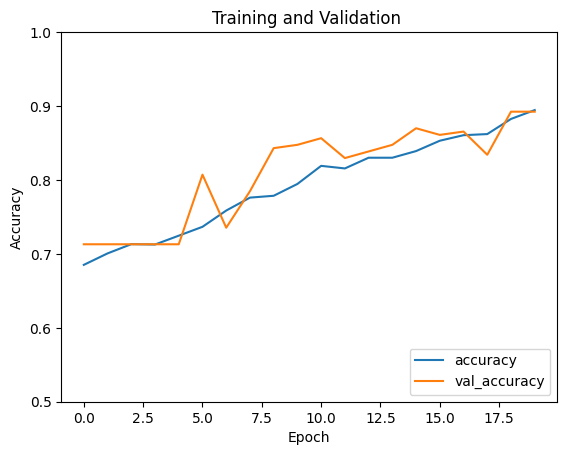

In [70]:
plt.plot(history_model.history['accuracy'], label='accuracy')
plt.plot(history_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Training and Validation ')
plt.legend(loc='lower right')
print(classification_report(y_test, np.argmax(y_predict, axis=1)))


#CNN.save("new_model_CNN.h5")

#Final Report

In [71]:
#create new dataframe named output with 2 coulmns and list the models
output = pd.DataFrame({'Model':['MobileNetV2','ResNet50V2','DenseNet169','CNN'],
                      'Accuracy':[ result_MobileNetV2[1]*100, result_ResNet50V2[1]*100 , result_DenseNet169[1]*100 ,result_CNN[1]*100 ]})

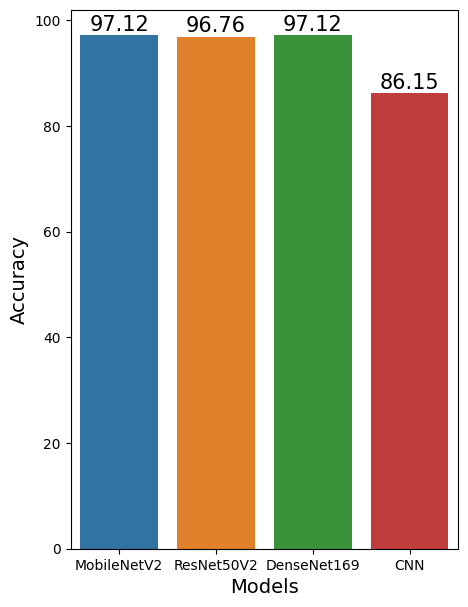

In [72]:
# Create a new figure to compare all four models accuracy
plt.figure(figsize=(5, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.show()

18/18 [==============================] - 2s 42ms/step


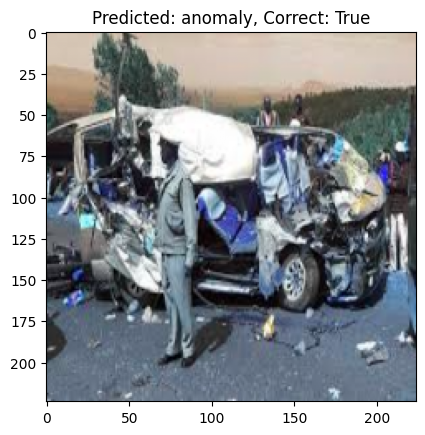

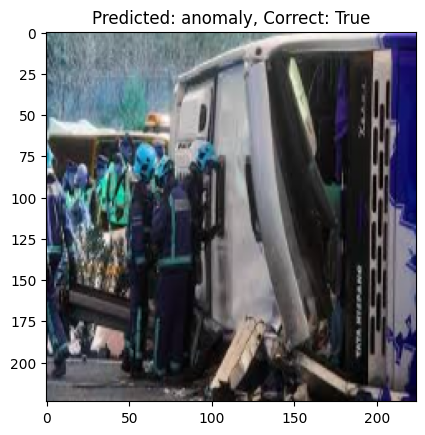

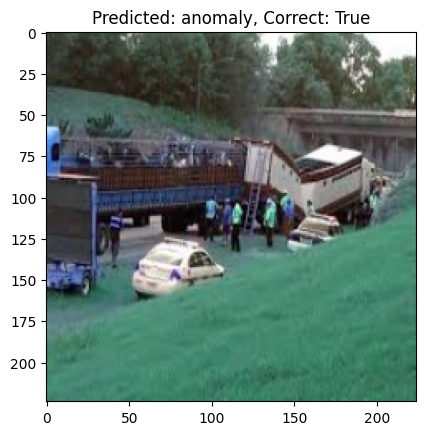

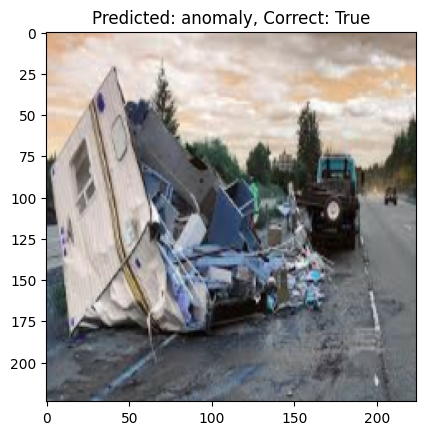

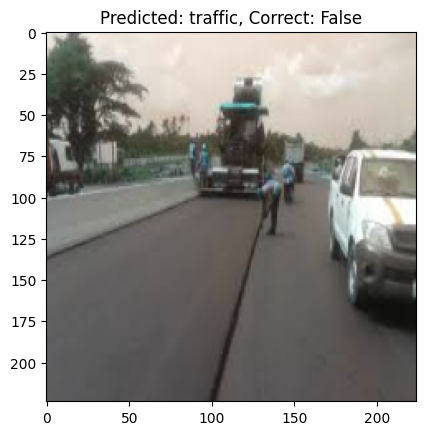

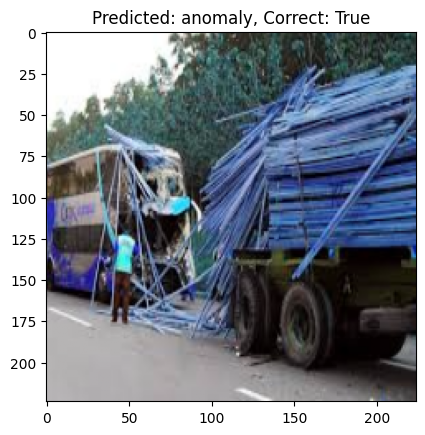

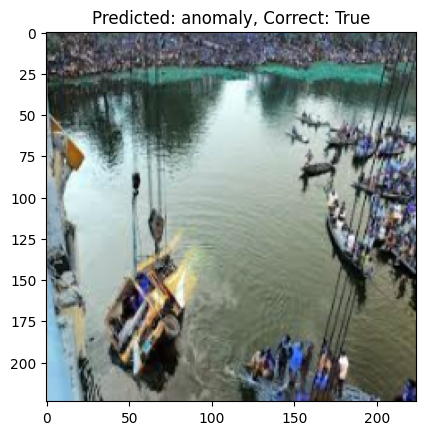

In [53]:
#Load the saved model and use the model to make predictions on the test data
model = tf.keras.models.load_model('/content/new_model_denseNet169.h5')
predictions = model.predict(x_test)
class_labels = ['anomaly', 'traffic', 'normal']
# Display the predicted images with true or false label
for i in range(10):
    predicted_index = np.argmax(predictions[i])
    true_index = np.argmax(y_test[i]) # get index of the true label
    image = x_test[i] # get image from the test data

# Get the predicted label using the predicted index
# Get the true label using the true index
    predicted_label = class_labels[predicted_index]
    true_label = class_labels[true_index]

    is_true = predicted_label == true_label  # Check if the predicted label is the same as the true label
    label_text = "True" if is_true else "False"

    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}, Correct: {label_text}')
    plt.show()